In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
plt.rc('figure',figsize=(15,7))

In [97]:
col=['instant','date','season','year','month','hour','holiday','weekday','weathersit','temp','atemp','humidity','wind_speed','causual','registered','bike_count']
df=pd.read_csv('/Users/akhilmaddu/Desktop/Bike-Sharing-Dataset/hour.csv')
#df.drop(df.index[[0]], inplace=True)

In [98]:
df.shape

(17379, 17)

In [99]:
np.sum(df['cnt'][0:24].values.tolist())

985

In [100]:
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# checking for missing values and null values

In [102]:
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [103]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [104]:
df[df.isnull().any(axis=1)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [105]:
iss=[]
for i in range(1,13):
    d=np.sum(df[df['casual']==i]['cnt'].values.tolist())
    print(d)
    iss.append(d)

27181
29764
38656
37314
38820
39289
39944
41477
43557
39355
46292
44538


In [106]:
len(iss)

12

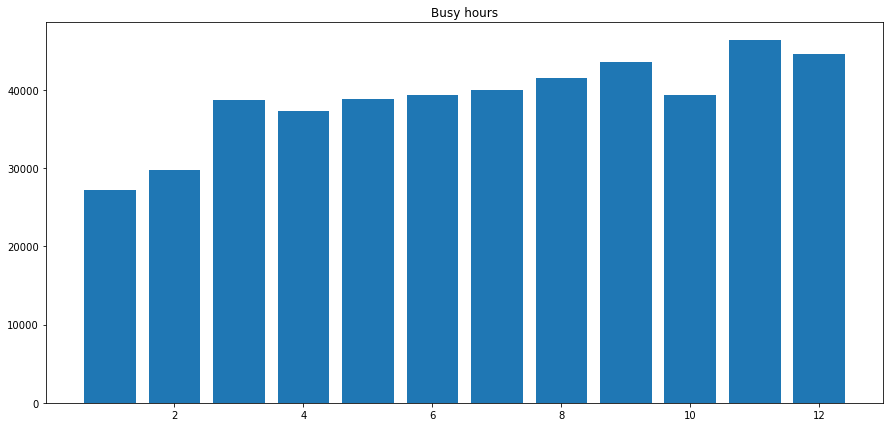

In [107]:
# popular months 
plt.bar(np.arange(1,13),iss)
#months=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
plt.title("Busy hours",fontweight=40)
plt.show()

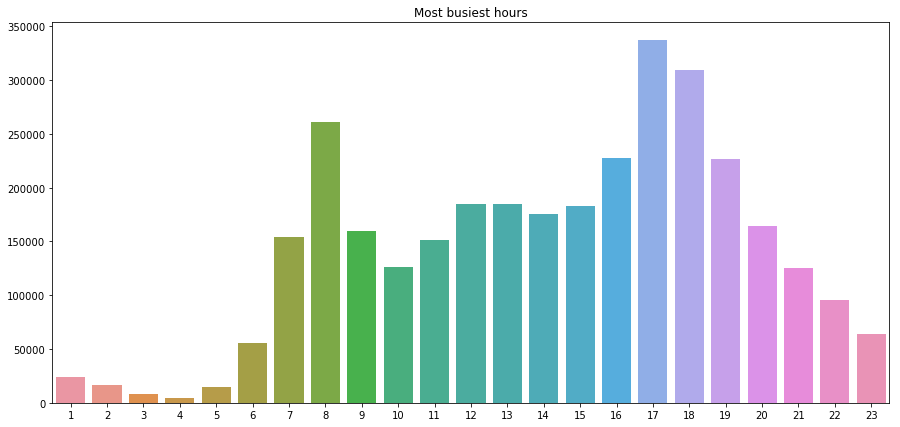

In [108]:
hours=[]
for i in range(1,24):
    d=np.sum(df[df['hr']==i]['cnt'].values.tolist())
    hours.append(d)
sns.barplot(np.arange(1,24),hours)
plt.title("Most busiest hours")
plt.show()

In [109]:
del df['instant']
del df['dteday']
count=df['cnt']
registered=df['registered']
del df['cnt']
del df['registered']


In [110]:
del df['yr']

In [111]:
x=df
y=df['casual']

In [112]:
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [114]:
import math 
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
xxx=pd.DataFrame(y_pred).values.tolist()
(mean_squared_error(y_test ,xxx))

2.3317923473516687e-27

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), df), reverse=True))

Features sorted by their score:
[(0.43580000000000002, 'casual'), (0.1037, 'hr'), (0.085500000000000007, 'windspeed'), (0.085500000000000007, 'hum'), (0.068199999999999997, 'atemp'), (0.067599999999999993, 'temp'), (0.048800000000000003, 'mnth'), (0.047199999999999999, 'weekday'), (0.023699999999999999, 'weathersit'), (0.0224, 'season'), (0.0083999999999999995, 'workingday'), (0.0032000000000000002, 'holiday')]


In [116]:
o=[]
for i in df.columns[:-1]:
    o.append(i)
    print(o)
    m=df[o]
    n=df['casual']
    X_train1, X_test1, y_train1, y_test1 = train_test_split(m, n, test_size=0.33)
    import math 
    LR1=LinearRegression()
    LR1.fit(X_train1,y_train1)
    y_pred1=LR1.predict(X_test1)
    xxx1=pd.DataFrame(y_pred1).values.tolist()
    print(mean_squared_error(y_test1 ,xxx1))
    

['season']
2341.33261551
['season', 'mnth']
2535.12694487
['season', 'mnth', 'hr']
2070.25979207
['season', 'mnth', 'hr', 'holiday']
2206.17554234
['season', 'mnth', 'hr', 'holiday', 'weekday']
2100.88449819
['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday']
1940.93425621
['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
1946.75130809
['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp']
1520.2040713
['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp']
1473.78479964
['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum']
1321.02311217
['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
1315.9821041


In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), df), reverse=True))

Features sorted by their score:
[(0.4466, 'casual'), (0.099599999999999994, 'hr'), (0.084900000000000003, 'windspeed'), (0.084699999999999998, 'hum'), (0.0693, 'temp'), (0.067299999999999999, 'atemp'), (0.049099999999999998, 'mnth'), (0.045499999999999999, 'weekday'), (0.022200000000000001, 'weathersit'), (0.0201, 'season'), (0.0073000000000000001, 'workingday'), (0.0033, 'holiday')]


In [118]:
s=['hr','hum','windspeed','atemp','temp','weekday','mnth','weathersit','season','workingday']

In [119]:
o=[]
for i in s:
    o.append(i)
    print(o)
    m=df[o]
    n=df['casual']
    X_train1, X_test1, y_train1, y_test1 = train_test_split(m, n, test_size=0.33)
    import math 
    LR1=LinearRegression()
    LR1.fit(X_train1,y_train1)
    y_pred1=LR1.predict(X_test1)
    
    print(mean_squared_error(y_test1 ,y_pred1))
    

['hr']
2140.44662102
['hr', 'hum']
2230.96109527
['hr', 'hum', 'windspeed']
2029.94976294
['hr', 'hum', 'windspeed', 'atemp']
1628.00730064
['hr', 'hum', 'windspeed', 'atemp', 'temp']
1712.51952768
['hr', 'hum', 'windspeed', 'atemp', 'temp', 'weekday']
1605.93353387
['hr', 'hum', 'windspeed', 'atemp', 'temp', 'weekday', 'mnth']
1630.93019527
['hr', 'hum', 'windspeed', 'atemp', 'temp', 'weekday', 'mnth', 'weathersit']
1586.33772022
['hr', 'hum', 'windspeed', 'atemp', 'temp', 'weekday', 'mnth', 'weathersit', 'season']
1665.8624497
['hr', 'hum', 'windspeed', 'atemp', 'temp', 'weekday', 'mnth', 'weathersit', 'season', 'workingday']
1304.29409393


In [120]:
 from sklearn.ensemble import RandomForestRegressor

In [125]:
RF=RandomForestRegressor()

In [126]:
x=df.drop(['casual'],axis=1)
#x=df
y=df['casual']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [127]:
s=RF.predict(X_test)

In [128]:
from math import sqrt
from sklearn.metrics import mean_squared_error

np.log(sqrt(mean_squared_error(y_test,s)))

2.857694761535754

# Univariate stastics

In [129]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile


SelectPercentile(percentile=80,
         score_func=<function f_classif at 0x11b767488>)

In [147]:
for i in range(10,110,10):
    select = SelectPercentile(percentile=i) 
    select.fit(x,y)
    x_selected= select.transform(x)
    new_df=pd.DataFrame(x_selected)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(new_df, y, test_size=0.33, random_state=42)
    RF.fit(X_train1, y_train1)
    s1=RF.predict(X_test1)
    print(np.log(sqrt(mean_squared_error(y_test,s1))))

3.77989893263
3.72362041324
3.6254775684
3.64364750969
3.13656382153
3.07278685056
3.04785076162
2.95464103501
2.88832875514
2.86000597352


In [177]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [178]:
for i in range(1,12):
    akhil=SelectKBest(chi2,k=i)
    akhil.fit(x,y)
    x_selected1= akhil.transform(x)
    new_df1=pd.DataFrame(x_selected1)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(new_df1, y, test_size=0.33,random_state=42)
    RF.fit(X_train1, y_train1)
    s1=RF.predict(X_test1)
    print(new_df1.shape)
    print(np.log(sqrt(mean_squared_error(y_test,s1))))

(17379, 1)
3.72396661343
(17379, 2)
3.60820825754
(17379, 3)
3.37443158155
(17379, 4)
3.33748304596
(17379, 5)
3.10991343144
(17379, 6)
3.08567531541
(17379, 7)
3.07034589025
(17379, 8)
3.02298258082
(17379, 9)
2.96724279062
(17379, 10)
2.87086926908
(17379, 11)
2.85924458364


In [179]:
for i in range(1,12):
    akhil=SelectKBest(chi2,k=i).fit_transform(x,y)
    #akhil.fit(x,y)
    #x_selected1= akhil.transform(x)
    new_df1=pd.DataFrame(akhil)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(new_df1, y, test_size=0.33,random_state=42)
    RF.fit(X_train1, y_train1)
    s1=RF.predict(X_test1)
    print(new_df1.shape)
    print(np.log(sqrt(mean_squared_error(y_test,s1))))

(17379, 1)
3.72292270534
(17379, 2)
3.60792527611
(17379, 3)
3.37335123408
(17379, 4)
3.34613347144
(17379, 5)
3.10928904065
(17379, 6)
3.09889291053
(17379, 7)
3.07025833049
(17379, 8)
3.02056309939
(17379, 9)
2.98632604363
(17379, 10)
2.8732200833
(17379, 11)
2.85926915167
